# Assignment 12
## Gal Dali

### Question 1

$$ y(0) = 1, y(2) = 3, y(4) = 2 $$

#### part a

$ \text{There are 3 samples spaced 2 units apart so: } \Delta = 2, N = 3 $

$ \text{using the formula: } f_k = \frac{k}{N\Delta}, k = [-\frac{N - 1}{2}, +\frac{N - 1}{2}] (for odd N) $

$ f_k = \frac{k}{6}, k \in [-1, 0, 1] $

$ f_k \in \{-\frac{1}{6}, 0, \frac{1}{6}\} $
$ \text{bonus: this list of numbers almost satisfies the weak negation property! (except that it's not a power of two. I must pass my upcoming exam in algorithms 1, it is such a hard test 😭)} $

#### part b

$A_k = \sum_{m=0}^{2} a_m e^{-i2\pi \frac{mk}{2}}, \quad k \in \{-1,0, 1\}$

$ A_{-1} = 1 \cdot e^{-i2\pi \frac{0 \cdot (-1)}{2}} + 3 \cdot e^{-i2\pi \frac{1 \cdot (-1)}{2}} + 2 \cdot e^{-i2\pi \frac{2 \cdot (-1)}{2}} = 1 + 3e^{i\pi} + 2e^{2i\pi} = 1 - 3 + 2 = 0 $

$ A_{0} = 1 \cdot e^{-i2\pi \frac{0 \cdot 0}{2}} + 3 \cdot e^{-i2\pi \frac{1 \cdot 0}{2}} + 2 \cdot e^{-i2\pi \frac{2 \cdot 0}{2}} = 1 + 3 + 2 = 6 $

$ A_{1} = 1 \cdot e^{-i2\pi \frac{0 \cdot 1}{2}} + 3 \cdot e^{-i2\pi \frac{1 \cdot 1}{2}} + 2 \cdot e^{-i2\pi \frac{2 \cdot 1}{2}} = 1 + 3e^{-i\pi} + 2e^{-2i\pi} = 1 - 3 + 2 = 0 $

### Question 2

$$ u(t) = sin(2\pi \cdot t) + sin(2\pi \cdot 3t) + sin(2\pi \cdot 5t) $$

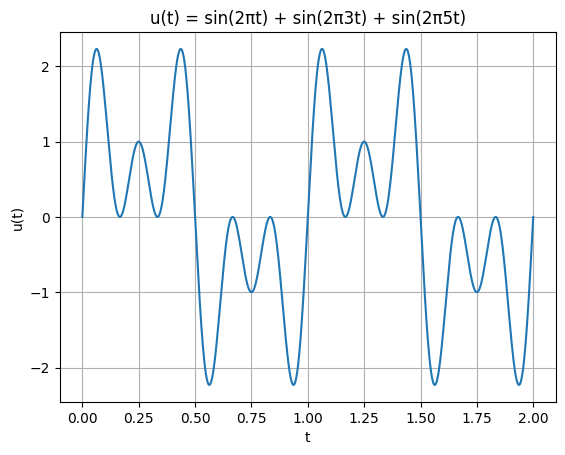

In [4]:
import numpy as np

# create a signal of u(t) = sin(2πt) + sin(2π3t) + sin(2π5t) for t = 0, ... 2
t = np.linspace(0, 2, 1000)
u = np.sin(2 * np.pi * t) + np.sin(2 * np.pi * 3 * t) + np.sin(2 * np.pi * 5 * t)

# plot the signal
import matplotlib.pyplot as plt

plt.plot(t, u)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('u(t) = sin(2πt) + sin(2π3t) + sin(2π5t)')
plt.grid()
plt.show()

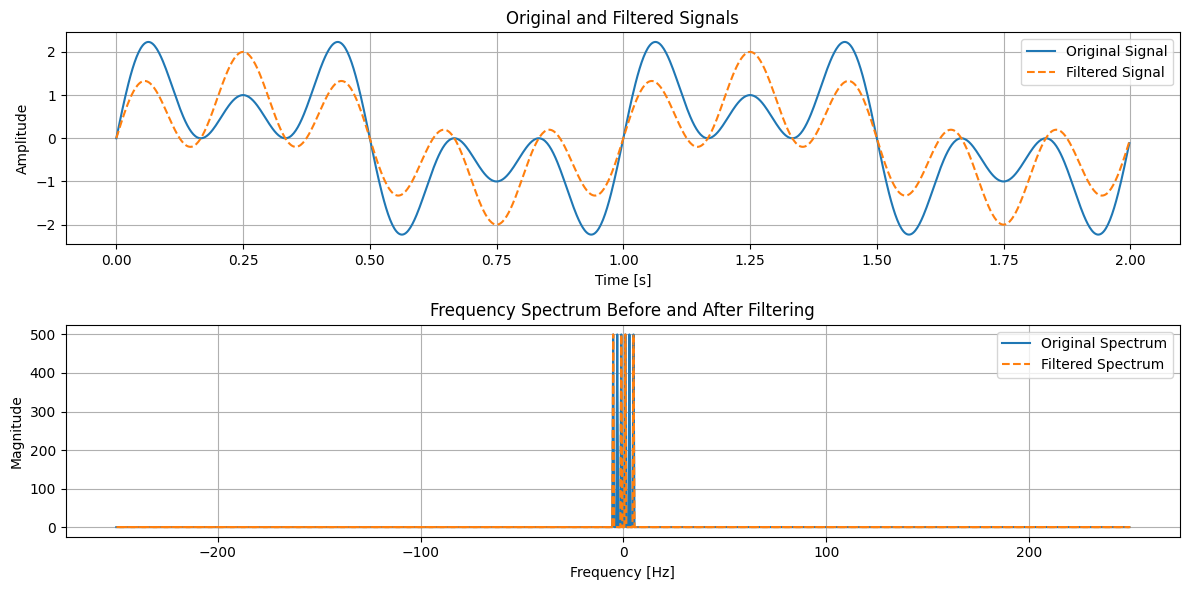

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define time range and sample rate
N = 1000  # Number of points
T = 2  # Duration
t = np.linspace(0, T, N, endpoint=False)
dt = t[1] - t[0]  # Time step
fs = 1 / dt  # Sampling frequency

# Create the signal
u = np.sin(2 * np.pi * t) + np.sin(2 * np.pi * 3 * t) + np.sin(2 * np.pi * 5 * t)

# Compute FFT
U_f = np.fft.fft(u)
frequencies = np.fft.fftfreq(N, dt)

# Shift FFT for visualization
U_f_shifted = np.fft.fftshift(U_f)
frequencies_shifted = np.fft.fftshift(frequencies)

# Create a mask to remove frequencies in range |f| ∈ [2,4]
mask = (np.abs(frequencies) < 2) | (np.abs(frequencies) > 4)
U_f_filtered = U_f * mask

# Apply inverse FFT
u_filtered = np.fft.ifft(U_f_filtered).real

# Plot original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, u, label="Original Signal")
plt.plot(t, u_filtered, label="Filtered Signal", linestyle="dashed")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Original and Filtered Signals")
plt.legend()
plt.grid()

# Plot FFT magnitude before and after filtering
plt.subplot(2, 1, 2)
plt.plot(frequencies_shifted, np.abs(U_f_shifted), label="Original Spectrum")
plt.plot(frequencies, np.abs(U_f_filtered), label="Filtered Spectrum", linestyle="dashed")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum Before and After Filtering")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### Question 3

$ x \in [-5, 5] $

$ \rho(x, t=0) = e^{-x^2 / 2} $

$\frac{\partial \rho}{\partial t} = D \frac{\partial^2 \rho}{\partial x^2}$

$ \text{where } D = 0.2. $

Find $\rho(x, t=10)$

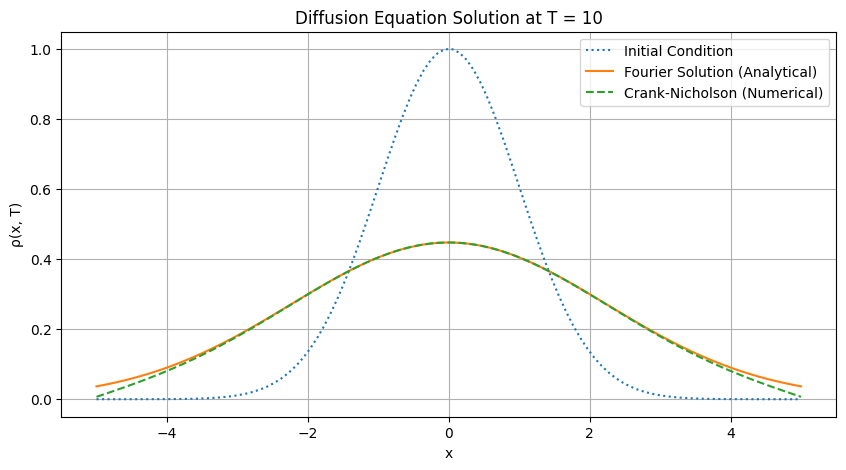

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Parameters
D = 0.2  # Diffusion coefficient
T = 10   # Final time
L = 5    # Domain from -L to L
Nx = 100  # Number of spatial points
Nt = 500  # Number of time steps
dx = 2 * L / (Nx - 1)  # Correct dx calculation
dt = T / Nt
r = D * dt / dx**2  # Stability parameter

# Spatial grid
x = np.linspace(-L, L, Nx)
rho_initial = np.exp(-x**2 / 2)

# Analytical solution using Fourier method
rho_fourier = (1 / np.sqrt(1 + 2 * D * T)) * np.exp(-x**2 / (2 + 4 * D * T))

# Crank-Nicholson Method Setup
main_diag = (1 + r) * np.ones(Nx)
off_diag = (-r / 2) * np.ones(Nx - 1)

# Construct the banded matrix A for solve_banded
A_banded = np.zeros((3, Nx))
A_banded[1, :] = main_diag  # Main diagonal
A_banded[0, 1:] = off_diag  # Upper diagonal
A_banded[2, :-1] = off_diag  # Lower diagonal

# Construct the matrix B for the right-hand side
B = np.zeros((Nx, Nx))
np.fill_diagonal(B, 1 - r)
np.fill_diagonal(B[:-1, 1:], r / 2)
np.fill_diagonal(B[1:, :-1], r / 2)

# Time stepping
rho_CN = rho_initial.copy()
for _ in range(Nt):
    rhs = B @ rho_CN  # Matrix-vector multiplication for the right-hand side
    rho_CN = solve_banded((1, 1), A_banded, rhs)  # Solve system

# Plot solutions
plt.figure(figsize=(10, 5))
plt.plot(x, rho_initial, label="Initial Condition", linestyle="dotted")
plt.plot(x, rho_fourier, label="Fourier Solution (Analytical)")
plt.plot(x, rho_CN, label="Crank-Nicholson (Numerical)", linestyle="dashed")
plt.xlabel("x")
plt.ylabel("ρ(x, T)")
plt.title("Diffusion Equation Solution at T = 10")
plt.legend()
plt.grid()
plt.show()
